# Pat Tutka 
# Data Munging Feature Extraction Homework
# 7-Mar-2018

Homework
Increase the number of columns and the types of normalizations to show an increase or decrease of the performance (precision, recall, f1) of the model you choose (SVM, log regression, MLP)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets, preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import RobustScaler
import pandas as pd
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer
%matplotlib inline
import matplotlib.pylab as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression as Model

In this assignment I chose four continuous variable preprocessing models (QuantileTransformer, StandardScaler, MinMaxScaler, RobustScaler) and two categorical variable models (LabelEncoder, OneHotEncoder) to test with classification algorithms that predict if an individual makes more or less than 50K.  I started by reclassifying categorical variables from the ADULT dataset to numerical variables and created a number of new feature columns. I used both the LabelEncoder and OneHotEncoder algorithms to perform this task and I did this to prepare the data to input as X in the classification model. Next I transformed four continuous integer variables using the (QuantileTransformer, StandardScaler, MinMaxScaler, RobustScaler)  algorithms. I also created four new features for each variable and appended them to the ADULT dataframe. I did this so that I could add the new variables to the classification model.

After I completed the preprocessing work, I conceptualized to determine which variables I wanted to include in the classification model. For the model I chose: age, workclass, education in years, occupation, race, sex, hours of work per week. Each one of the listed variables was either binary or an integer normailzed during preprocessing and I thought they would be good predictors of if an individual makes less than or more than 50K. For the classification algorithm type I chose both Linear SVM and KNN-Neighbors (5 nearest). The SVM model did not produce very much variation in results however, the KNN model showed variation with the StandardScaler preprocessing tool especially with recall scores predicting 0 (<=50k) and 1 (>50k). The model improved in predicting if somebody makes less than 50k but decreased the accuracy of predicting is somebody make more than 50k. I believe this happened because StandardScaler distributed the data closer to 0 thus causing the KNN (5 nearest) model to predict more 0 (<=50k) and less (>50k). The SVM linear model took a much stiffer approach and did not change very much. 

In [94]:
SVMresult = pd.read_csv('../data/Preprocessing.csv', index_col=None, names=None)

The below clean tables represent results from both a SVM model (first table) and KNN model (5 nearest) (second table). The scores on the left depict "0" (<=50k) in the classification report and the scores on the right depict "1" (>50k). A current ADULT dataframe is below the second table and includes the new features that I created and used in the classifcation models. 

In [95]:
SVMresult

,PreprocessModel,Precision,Recall,F1 Score,PreprocessModel.1,Precision.1,Recall.1,F1 Score.1
0,QuantileTransformer,0.84,0.93,0.88,QuantileTransformer,0.67,0.43,0.52
1,StandardScaler,0.84,0.94,0.88,StandardScaler,0.67,0.42,0.52
2,MinMaxScaler,0.84,0.94,0.88,MinMaxScaler,0.67,0.42,0.52
3,RobustScaler,0.84,0.94,0.88,RobustScaler,0.67,0.42,0.52


In [96]:
KNNresults = pd.read_csv('../data/KNNresults.csv', index_col=None, names=None)
KNNresults

,PreprocessModel,Precision,Recall,F1 Score,Precision.1,Recall.1,F1 Score.1
0,QuantileTransformer,0.88,0.93,0.90,0.73,0.60,0.66
1,StandardScaler,0.88,0.93,0.91,0.74,0.61,0.66
2,MinMaxScaler,0.88,0.93,0.91,0.74,0.60,0.66
3,RobustScaler,0.88,0.93,0.91,0.74,0.60,0.66


In [171]:
adult

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,workclass,wclass0,wclass1,wclass2,wclass3,wclass4,wclass5,wclass6,wclass7,wclass8,education,ed0,ed1,ed2,ed3,ed4,ed5,ed6,ed7,ed8,ed9,ed10,ed11,ed12,ed13,ed14,ed15,marital_stat,ms0,ms1,ms2,ms3,ms4,ms5,ms6,occupation,occ0,occ1,occ2,occ3,occ4,occ5,occ6,occ7,occ8,occ9,occ10,occ11,occ12,occ13,occ14,race,race0,race1,race2,race3,race4,sex,sex0,sex1,native_country,country0,country1,country2,country3,country4,country5,country6,country7,country8,country9,country10,country11,country12,country13,country14,country15,country16,country17,country18,country19,country20,country21,country22,country23,country24,country25,country26,country27,country28,country29,country30,country31,country32,country33,country34,country35,country36,country37,country38,country39,country40,country41,age,age2,age3,capital,capital2,capital3,capital4,hours,hours2,hours3,hours4,yearsed,yearsed2,yearsed3,yearsed4,age4
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,1.0,1,0.0,1.0,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.10,0.030671,0.301370,9.229229e-01,0.148453,0.021740,2174.0,0.472472,-0.035429,0.397959,0.0,0.834334,1.134739,0.800000,1.000000,0.10
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,1.0,1,0.0,1.0,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.65,0.837109,0.452055,1.000000e-07,-0.145920,0.000000,0.0,0.028529,-2.222153,0.122449,-5.4,0.834334,1.134739,0.800000,1.000000,0.65
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,1.0,1,0.0,1.0,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.05,-0.042642,0.287671,1.000000e-07,-0.145920,0.000000,0.0,0.472472,-0.035429,0.397959,0.0,0.291792,-0.420060,0.533333,-0.333333,0.05
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,1.0,0.0,0.0,1,0.0,1.0,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.80,1.057047,0.493151,1.000000e-07,-0.145920,0.000000,0.0,0.472472,-0.035429,0.397959,0.0,0.099600,-1.197459,0.400000,-1.000000,0.80
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,0.0,0.0,1.0,0.0,0.0,0,1.0,0.0,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.45,-0

In [2]:
adult = pd.read_csv('../data/adult.data', header=None)

In [3]:
le = preprocessing.LabelEncoder()
adult[14] = le.fit_transform(adult[14])

I first converted the dependent variable, if somebody makes <= 50k or >50 to 0 or 1 in column 14 using the LabelEncoder function. The value 0 represents if someone makes <=50k and 1 represents if someone make >50k. 

In [4]:
adult.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


# Feature one (column 1) "workclass" conversion from categorical to INT variable

In [5]:
label_encoder = preprocessing.LabelEncoder()

In [6]:
workclass = label_encoder.fit_transform(adult[1])

In [7]:
adult['workclass'] = workclass

I created a new column "workclass" representing the type of work that the indivdual in the study does for a living. The coded value '0' in the column represents '?' which I am treating as missing data. I am going to create a new column for 0; however, I will not use it in classification models I choose to test. Next I will create new columns for the individual work classes. 

In [8]:
onehotwc = preprocessing.OneHotEncoder(sparse=False)

In [9]:
workclass_mat = onehotwc.fit_transform(adult[['workclass']])

In [10]:
wc_df = pd.DataFrame(workclass_mat)

In [11]:
wc_df.columns = ["wclass" + str(i) for i in range(0, 9)]

In [12]:
adult = pd.concat([adult, wc_df], axis=1) # this is an important step in adding new columns!

In [13]:
adult.wclass1.value_counts(normalize=False) # As a test I ran a value count for wclass1 to see how many '1' were in the column. 

0.0    31601
1.0      960
Name: wclass1, dtype: int64

# Feature three (column 3) "education" conversion from categorical to INT variable

In [14]:
label_encoder = preprocessing.LabelEncoder()

In [15]:
education = label_encoder.fit_transform(adult[3])

In [16]:
adult['education'] = education

In [17]:
onehotwc = preprocessing.OneHotEncoder(sparse=False)

In [18]:
education_mat = onehotwc.fit_transform(adult[['education']])

In [19]:
ed_df = pd.DataFrame(education_mat)

In [20]:
ed_df.columns = ["ed" + str(i) for i in range(0, 16)]

In [21]:
adult = pd.concat([adult, ed_df], axis=1) # this is an important step in adding new columns!
adult

,0,1,2,3,4,5,6,7,8,9,...,ed6,ed7,ed8,ed9,ed10,ed11,ed12,ed13,ed14,ed15
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature five (column 5) "marital status" conversion from categorical to INT variable

In [22]:
label_encoder = preprocessing.LabelEncoder()
marital_status = label_encoder.fit_transform(adult[5])
adult['marital_stat'] = marital_status

In [23]:
onehotwc = preprocessing.OneHotEncoder(sparse=False)
marital_mat = onehotwc.fit_transform(adult[['marital_stat']])
ms_df = pd.DataFrame(marital_mat)

In [24]:
ms_df.columns = ["ms" + str(i) for i in range(0, 7)]

In [25]:
adult = pd.concat([adult, ms_df], axis=1)
adult

,0,1,2,3,4,5,6,7,8,9,...,ed14,ed15,marital_stat,ms0,ms1,ms2,ms3,ms4,ms5,ms6
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0.0,0.0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0.0,0.0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0.0,0.0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0.0,0.0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,...,0.0,0.0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,...,0.0,0.0,3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0.0,0.0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,...,0.0,0.0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0.0,0.0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [26]:
adult.marital_stat.value_counts()

2    14976
4    10683
0     4443
5     1025
6      993
3      418
1       23
Name: marital_stat, dtype: int64

# Feature six (column 6) "occupation" conversion from categorical to INT variable
I once again found rows with "?" values. I decided to make a new column for the ? value (Occ0) but I will not include the column in the classification model later in the assignment. There are 1843 values coded as ?. 

In [27]:
label_encoder = preprocessing.LabelEncoder()
occupation = label_encoder.fit_transform(adult[6])
adult['occupation'] = occupation

In [28]:
onehotwc = preprocessing.OneHotEncoder(sparse=False)
occupation_mat = onehotwc.fit_transform(adult[['occupation']])
o_df = pd.DataFrame(occupation_mat)

In [29]:
o_df.columns = ["occ" + str(i) for i in range(0, 15)]

In [30]:
adult = pd.concat([adult, o_df], axis=1)
adult

,0,1,2,3,4,5,6,7,8,9,...,occ5,occ6,occ7,occ8,occ9,occ10,occ11,occ12,occ13,occ14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Feature eight (column 8) "race" conversion from categorical to INT variable

In [31]:
label_encoder = preprocessing.LabelEncoder()
race = label_encoder.fit_transform(adult[8])
adult['race'] = race

In [32]:
onehotwc = preprocessing.OneHotEncoder(sparse=False)
race_mat = onehotwc.fit_transform(adult[['race']])
race_df = pd.DataFrame(race_mat)

In [33]:
race_df.columns = ["race" + str(i) for i in range(0, 5)]

In [34]:
adult = pd.concat([adult, race_df], axis=1)
adult

,0,1,2,3,4,5,6,7,8,9,...,occ11,occ12,occ13,occ14,race,race0,race1,race2,race3,race4
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,1.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,1.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,1.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0.0,0.0,0.0,0.0,2,0.0,0.0,1.0,0.0,0.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0.0,0.0,0.0,0.0,2,0.0,0.0,1.0,0.0,0.0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,...,0.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,1.0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,...,0.0,0.0,0.0,0.0,2,0.0,0.0,1.0,0.0,0.0
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,1.0
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,...,0.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,1.0
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,1.0


# Feature nine (column 9) "sex" conversion from categorical to INT variable

In [35]:
label_encoder = preprocessing.LabelEncoder()
sex = label_encoder.fit_transform(adult[9])
adult['sex'] = sex

In [36]:
onehotwc = preprocessing.OneHotEncoder(sparse=False)
sex_mat = onehotwc.fit_transform(adult[['sex']])
sex_df = pd.DataFrame(sex_mat)

In [37]:
sex_df.columns = ["sex" + str(i) for i in range(0, 2)]

In [38]:
adult = pd.concat([adult, sex_df], axis=1)


In [39]:
pd.set_option('display.max_column', 150)

In [40]:
# Feature nine (column 13) "native_country" conversion from categorical to INT variable

In [41]:
label_encoder = preprocessing.LabelEncoder()
native_country = label_encoder.fit_transform(adult[13])
adult['native_country'] = native_country

In [42]:
onehotwc = preprocessing.OneHotEncoder(sparse=False)
native_country_mat = onehotwc.fit_transform(adult[['native_country']])
nc_df = pd.DataFrame(native_country_mat)

In [43]:
nc_df.columns = ["country" + str(i) for i in range(0, 42)]

In [44]:
adult = pd.concat([adult, nc_df], axis=1)

In [45]:
adult 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,workclass,wclass0,wclass1,wclass2,wclass3,wclass4,wclass5,wclass6,wclass7,wclass8,education,ed0,ed1,ed2,ed3,ed4,ed5,ed6,ed7,ed8,ed9,ed10,ed11,ed12,ed13,ed14,ed15,marital_stat,ms0,ms1,ms2,ms3,ms4,ms5,ms6,occupation,occ0,occ1,occ2,occ3,occ4,occ5,occ6,occ7,occ8,occ9,occ10,occ11,occ12,occ13,occ14,race,race0,race1,race2,race3,race4,sex,sex0,sex1,native_country,country0,country1,country2,country3,country4,country5,country6,country7,country8,country9,country10,country11,country12,country13,country14,country15,country16,country17,country18,country19,country20,country21,country22,country23,country24,country25,country26,country27,country28,country29,country30,country31,country32,country33,country34,country35,country36,country37,country38,country39,country40,country41
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,1.0,1,0.0,1.0,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,1.0,1,0.0,1.0,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,1.0,1,0.0,1.0,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,1.0,0.0,0.0,1,0.0,1.0,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,0.0,0.0,1.0,0.0,0.0,0,1.0,0.0,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,1.0,0,1.0,0.0,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6,0.0,0.0

# Preprocessing for the continous variables. In this section I chose to transform age, education in years, hours per week, and capital gains. I chose four transformation algorithms, QuantileTransformer, StandardScaler, MinMaxScaler, and RobustScaler. After I tranform the four features I will choose the X features for the model in the next step. 

In [46]:
scaler1 = preprocessing.QuantileTransformer()
age = scaler1.fit_transform(adult[[0]])
adult['age'] = age

In [47]:
standard = preprocessing.StandardScaler()
age2 = standard.fit_transform(adult[[0]])
adult['age2'] = age2

In [48]:
scaler = preprocessing.MinMaxScaler()
age3 = scaler.fit_transform(adult[[0]])
adult['age3'] = age3

In [49]:
scaler = preprocessing.RobustScaler()
age4 = scaler.fit_transform(adult[[0]])
adult['age4'] = age4

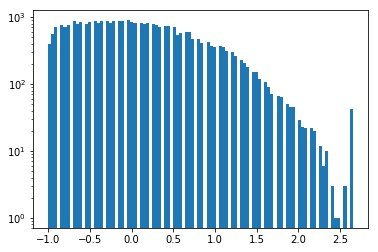

In [50]:
#_=plt.hist(age, 100, log=True)
#_=plt.hist(age2, 100, log=True)
#_=plt.hist(age3, 100, log=True)
_=plt.hist(age4, 100, log=True)

Below is an example of eight dimensions of the workclass features predicting if a person makes <=50K or >50K. The linear SVM algorithm had an accuracy score of 0.76

In [51]:
feature_cols = ['wclass1','wclass2','wclass3','wclass4','wclass5','wclass6','wclass7','wclass8']
X = adult[feature_cols]
y = adult[14]
model = SVC(kernel='linear')
model.fit(X, y)
#adult['wclasspred'] = model.predict(X)
wclass_predictions = model.predict(X)
#the model creates predictions for the accuracy score and confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(adult[14], wclass_predictions.round()) 
#confusion_matrix(adult[14], wclass_predictions.round())
#print(classification_report(adult[14], wclass_predictions.round()))

0.76312152575166614

In [52]:
X = age4
y = adult[14]
model = SVC(kernel='linear')
model.fit(X, y)
#adult['wclasspred'] = model.predict(X)
age_predictions = model.predict(X)
#the model creates predictions for the accuracy score and confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(adult[14], wclass_predictions.round()) 
#confusion_matrix(adult[14], wclass_predictions.round())
#print(classification_report(adult[14], wclass_predictions.round()))

0.76312152575166614

In [53]:
scaler = preprocessing.QuantileTransformer()
capital = scaler.fit_transform(adult[[10]])
adult['capital'] = capital

In [54]:
standard = preprocessing.StandardScaler()
capital2 = standard.fit_transform(adult[[10]])
adult['capital2'] = capital2

In [55]:
scaler = preprocessing.MinMaxScaler()
capital3 = scaler.fit_transform(adult[[10]])
adult['capital3'] = capital3

In [56]:
scaler = preprocessing.RobustScaler()
capital4 = scaler.fit_transform(adult[[10]])
adult['capital4'] = capital4

In [57]:
#_=plt.hist(capital, 100, log=True)
#_=plt.hist(capital2, 100, log=True)
#_=plt.hist(capital3, 100, log=True)
#_=plt.hist(capital4, 100, log=True)

In [58]:
scaler = preprocessing.QuantileTransformer()
hours = scaler.fit_transform(adult[[12]])
adult['hours'] = hours

In [59]:
standard = preprocessing.StandardScaler()
hours2 = standard.fit_transform(adult[[12]])
adult['hours2'] = hours2

In [60]:
scaler = preprocessing.MinMaxScaler()
hours3 = scaler.fit_transform(adult[[12]])
adult['hours3'] = hours3

In [61]:
scaler = preprocessing.RobustScaler()
hours4 = scaler.fit_transform(adult[[12]])
adult['hours4'] = hours4

In [62]:
#_=plt.hist(hours, 100, log=True)
#_=plt.hist(hours2, 100, log=True)
#_=plt.hist(hours3, 100, log=True)
#_=plt.hist(hours4, 100, log=True)

In [63]:
X = capital
y = adult[14]
model = SVC(kernel='rbf')
model.fit(X, y)
#adult['wclasspred'] = model.predict(X)
capital_predictions = model.predict(X)
#the model creates predictions for the accuracy score and confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#accuracy_score(adult[14], capital_predictions.round()) 
#confusion_matrix(adult[14], capital_predictions.round())
print(classification_report(adult[14], capital_predictions.round()))

             precision    recall  f1-score   support

          0       0.79      0.99      0.88     24720
          1       0.90      0.19      0.32      7841

avg / total       0.82      0.80      0.75     32561



In [64]:
scaler = preprocessing.QuantileTransformer()
yearsed = scaler.fit_transform(adult[[4]])
adult['yearsed'] = yearsed

In [65]:
standard = preprocessing.StandardScaler()
yearsed2 = standard.fit_transform(adult[[4]])
adult['yearsed2'] = yearsed2

In [66]:
scaler = preprocessing.MinMaxScaler()
yearsed3 = scaler.fit_transform(adult[[4]])
adult['yearsed3'] = yearsed3

In [67]:
scaler = preprocessing.RobustScaler()
yearsed4 = scaler.fit_transform(adult[[4]])
adult['yearsed4'] = yearsed4

# I began to build my model below. I chose age, workclass, education in years, occupation, race, sex, and hours per week to test the various transformations. 

In [68]:
adult

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,workclass,wclass0,wclass1,wclass2,wclass3,wclass4,wclass5,wclass6,wclass7,wclass8,education,ed0,ed1,ed2,ed3,ed4,ed5,ed6,ed7,ed8,ed9,ed10,ed11,ed12,ed13,ed14,ed15,marital_stat,ms0,ms1,ms2,ms3,ms4,ms5,ms6,occupation,occ0,occ1,occ2,occ3,occ4,occ5,occ6,occ7,occ8,occ9,occ10,occ11,occ12,occ13,occ14,race,race0,race1,race2,race3,race4,sex,sex0,sex1,native_country,country0,country1,country2,country3,country4,country5,country6,country7,country8,country9,country10,country11,country12,country13,country14,country15,country16,country17,country18,country19,country20,country21,country22,country23,country24,country25,country26,country27,country28,country29,country30,country31,country32,country33,country34,country35,country36,country37,country38,country39,country40,country41,age,age2,age3,age4,capital,capital2,capital3,capital4,hours,hours2,hours3,hours4,yearsed,yearsed2,yearsed3,yearsed4
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,1.0,1,0.0,1.0,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.550551,0.030671,0.301370,0.10,9.229229e-01,0.148453,0.021740,2174.0,0.472472,-0.035429,0.397959,0.0,0.834334,1.134739,0.800000,1.000000
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,1.0,1,0.0,1.0,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.792292,0.837109,0.452055,0.65,1.000000e-07,-0.145920,0.000000,0.0,0.028529,-2.222153,0.122449,-5.4,0.834334,1.134739,0.800000,1.000000
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0.0,0.0,0.0,0.0,1.0,1,0.0,1.0,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.525025,-0.042642,0.287671,0.05,1.000000e-07,-0.145920,0.000000,0.0,0.472472,-0.035429,0.397959,0.0,0.291792,-0.420060,0.533333,-0.333333
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,1.0,0.0,0.0,1,0.0,1.0,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.841341,1.057047,0.493151,0.80,1.000000e-07,-0.145920,0.000000,0.0,0.472472,-0.035429,0.397959,0.0,0.099600,-1.197459,0.400000,-1.000000
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,0.0,0.0,1.0,0.0,0.0,0,1.0,0.0,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [69]:
feature_cols = ['age4', 'yearsed4','hours4','wclass1','wclass2','wclass3','wclass4','wclass5','wclass6','wclass7','wclass8','occ1','occ2','occ3','occ4','occ5','occ6','occ7','occ8','occ9','occ10','occ11','occ12','occ13','occ14', 'race0','race1','race2','race3','race4','sex0', 'sex1']
X = adult[feature_cols]
y = adult[14]
model = SVC(kernel='linear')
model.fit(X, y)
#adult['model_predictions1'] = model.predict(X)
model_predictions = model.predict(X)
#the model creates predictions for the accuracy score and confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#accuracy_score(adult[14], model_predictions.round()) 
#confusion_matrix(adult[14], model_predictions.round())
print(classification_report(adult[14], model_predictions.round()))

             precision    recall  f1-score   support

          0       0.84      0.94      0.88     24720
          1       0.67      0.42      0.52      7841

avg / total       0.80      0.81      0.79     32561



In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
feature_cols = ['age4', 'yearsed4','hours4','wclass1','wclass2','wclass3','wclass4','wclass5','wclass6','wclass7','wclass8','occ1','occ2','occ3','occ4','occ5','occ6','occ7','occ8','occ9','occ10','occ11','occ12','occ13','occ14', 'race0','race1','race2','race3','race4','sex0', 'sex1']
X = adult[feature_cols]
y = adult[14]
classifier = KNeighborsClassifier(n_neighbors=5)
model_predictions2 = classifier.fit(X, y)
#adult['model_predictions1'] = model.predict(X)
model_predictions2 = classifier.predict(X)
#the model creates predictions for the accuracy score and confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#accuracy_score(adult[14], model_predictions1.round()) 
#confusion_matrix(adult[14], model_predictions1.round())
print(classification_report(adult[14], model_predictions2.round()))

             precision    recall  f1-score   support

          0       0.88      0.93      0.91     24720
          1       0.74      0.60      0.66      7841

avg / total       0.85      0.85      0.85     32561



In [88]:
feature_col = ['age','yearsed','hours']
X = adult[feature_col]
y = adult[14]
classifier = KNeighborsClassifier(n_neighbors=6)
model_predictions11 = classifier.fit(X, y)
#adult['model_predictions1'] = model.predict(X)
model_predictions11 = classifier.predict(X)
#the model creates predictions for the accuracy score and confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#accuracy_score(adult[14], model_predictions1.round()) 
#confusion_matrix(adult[14], model_predictions1.round())
print(classification_report(adult[14], model_predictions11.round()))

             precision    recall  f1-score   support

          0       0.82      0.95      0.88     24720
          1       0.71      0.35      0.46      7841

avg / total       0.79      0.81      0.78     32561



# Neural Networks

In [59]:
from sklearn.neural_network import MLPClassifier
X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = MLPClassifier(solver='sgd', alpha=1e-5,
                    hidden_layer_sizes=(5, ), random_state=1)

clf.fit(X, y)        

C:\Users\Pat\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [60]:
clf.predict([[.3,.5]])

array([0])

# Homework
Increase the number of columns and the types of normalizations to show an increase or decrease of the performance (precision, recall, f1) of the model you choose (SVM, log regression, MLP)